In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

df_2018 = pd.read_csv("velo_2018.csv", sep = ";")

In [51]:
display(df_2018)

,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du point de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100041488,27 Boulevard Diderot E-O,21.0,2018-06-11T09:45:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
1,100041488,27 Boulevard Diderot E-O,4.0,2018-06-11T11:30:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
2,100041488,27 Boulevard Diderot E-O,2.0,2018-06-13T00:30:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
3,100041488,27 Boulevard Diderot E-O,0.0,2018-06-13T04:30:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
4,100041488,27 Boulevard Diderot E-O,1.0,2018-06-13T04:45:00+02:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456"
...,...,...,...,...,...,...,...
2271172,100056335,Quai d'Orsay,NaN,2018-05-18T21:30:00+02:00,2019-11-07,https://www.eco-visio.net/Photos/100056335/157...,"48.86288,2.31179"
2271173,100056335,Quai d'Orsay,NaN,2018-05-18T22:00:00+02:00,2019-11-07,https://www.eco-visio.net/Photos/100056335/157...,"48.86288,2.31179"
2271174,100056335,Quai d'Orsay,NaN,2018-05-19T05:15:00+02:00,2019-11-07,https://www.eco-visio.net/Photos/100056335/157...,"48.86288,2.31179"
2271175,100056335,Quai d'Orsay,NaN,2018-05-19T08:30:00+02:00,2019-11-07,https://www.eco-visio.net/Photos/100056335/157...,"48.86288,2.31179"


In [80]:
# Compter le nombre de NaN/NaT dans chaque colonne
nan_counts = df_2018.isna().sum()

print(nan_counts)
print('''
Attention tous les résultats montre des tendances néanmoins
ils comportent énorméments de NaN notamment le Comptage horaire.''')

Identifiant du point de comptage                  0
Nom du point de comptage                      69877
Comptage horaire                            1788854
Date et heure de comptage                         0
Date d'installation du point de comptage      69877
Lien vers photo du point de comptage          69877
Coordonnées géographiques                     69877
Jour                                              0
Mois                                              0
Année                                             0
Heure                                             0
dtype: int64

Attention tous les résultats montre des tendances néanmoins
ils comportent énorméments de NaN notamment le Comptage horaire.


In [54]:
df_2018["Nom du point de comptage"].nunique()

63

In [6]:
# Convertir la colonne en datetime (avec gestion du fuseau horaire)
df_2018["Date et heure de comptage"] = pd.to_datetime(df_2018["Date et heure de comptage"], utc=True)
df_2018["Date et heure de comptage"] = df_2018["Date et heure de comptage"].dt.tz_localize(None)

In [56]:
#Met les dates dans l'ordre croissant
df_2018 = df_2018.sort_values(by="Date et heure de comptage")

In [64]:
df_2018["Jour"] = df_2018["Date et heure de comptage"].dt.date
df_2018["Mois"] = df_2018["Date et heure de comptage"].dt.month
df_2018["Année"] = df_2018["Date et heure de comptage"].dt.year
df_2018["Heure"] = df_2018["Date et heure de comptage"].dt.hour

In [65]:
df_2018.head()

,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du point de comptage,Lien vers photo du point de comptage,Coordonnées géographiques,Jour,Mois,Année,Heure
0,100041488,27 Boulevard Diderot E-O,21.0,2018-06-11 07:45:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456",2018-06-11,6,2018,7
1,100041488,27 Boulevard Diderot E-O,4.0,2018-06-11 09:30:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456",2018-06-11,6,2018,9
2,100041488,27 Boulevard Diderot E-O,2.0,2018-06-12 22:30:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456",2018-06-12,6,2018,22
3,100041488,27 Boulevard Diderot E-O,0.0,2018-06-13 02:30:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456",2018-06-13,6,2018,2
4,100041488,27 Boulevard Diderot E-O,1.0,2018-06-13 02:45:00,2013-01-17,https://www.eco-visio.net/Photos/100041488/151...,"48.846099,2.375456",2018-06-13,6,2018,2


In [97]:
comptage_annuel_2018 = df_2018.groupby("Année")["Comptage horaire"].sum()
comptage_mensuel_2018 = df_2018.groupby("Mois")["Comptage horaire"].sum()
comptage_quotidien_2018 = df_2018.groupby("Jour")["Comptage horaire"].sum()
comptage_horaire_2018 = df_2018.groupby("Heure")["Comptage horaire"].sum()

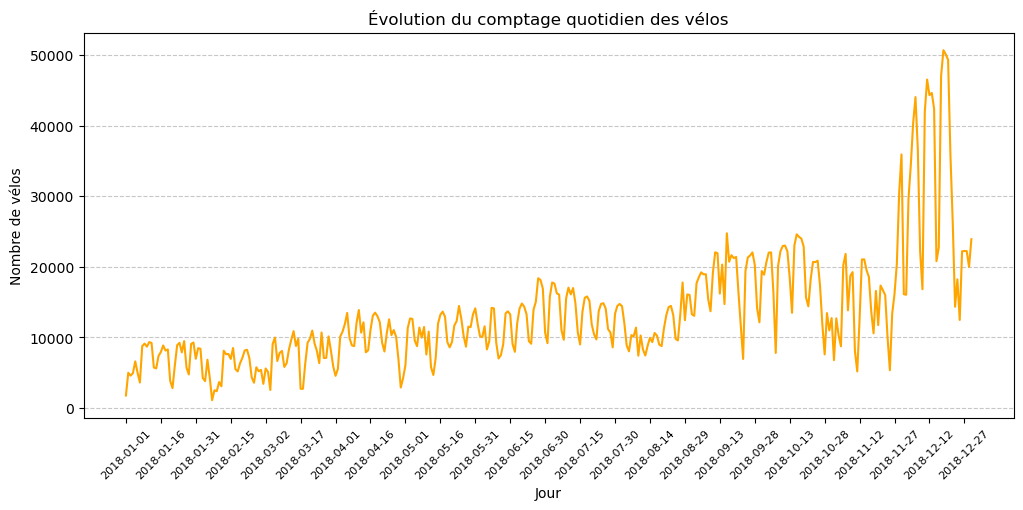

In [98]:
plt.figure(figsize=(12, 5))
plt.plot(comptage_quotidien_2018.index.astype(str), comptage_quotidien_2018.values, linestyle = "-", color = "orange")

plt.xlabel("Jour")
plt.ylabel("Nombre de vélos")
plt.title("Évolution du comptage quotidien des vélos")
plt.xticks(ticks = range(0, len(comptage_quotidien_2018), 15), labels = comptage_quotidien_2018.index[::15].astype(str), rotation = 45, fontsize = 8)

plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show() 

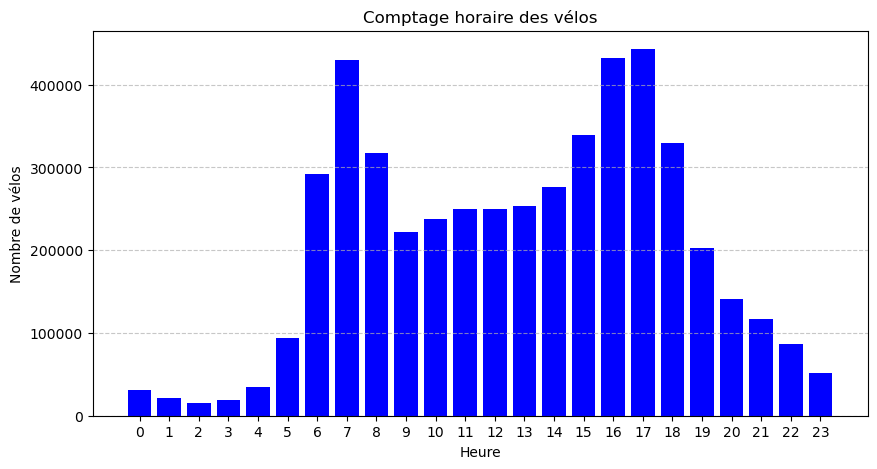


Nous pouvons constater ici que les heures les plus fréquentées sont celles de 7h et 17h
ce qui correspond plus ou moins aux horaires de travail et celles des étudiants.


In [99]:
plt.figure(figsize=(10, 5))
plt.bar(comptage_horaire_2018.index, comptage_horaire_2018.values, color = "blue")
plt.xticks(range(0,24))
plt.xlabel("Heure")
plt.ylabel("Nombre de vélos")
plt.title("Comptage horaire des vélos")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

print('''
Nous pouvons constater ici que les heures les plus fréquentées sont celles de 7h et 17h
ce qui correspond plus ou moins aux horaires de travail et celles des étudiants.''')

In [70]:
site_groups_2018 = np.array_split(df_2018["Nom du point de comptage"].unique(), 3)

<Figure size 1200x600 with 0 Axes>

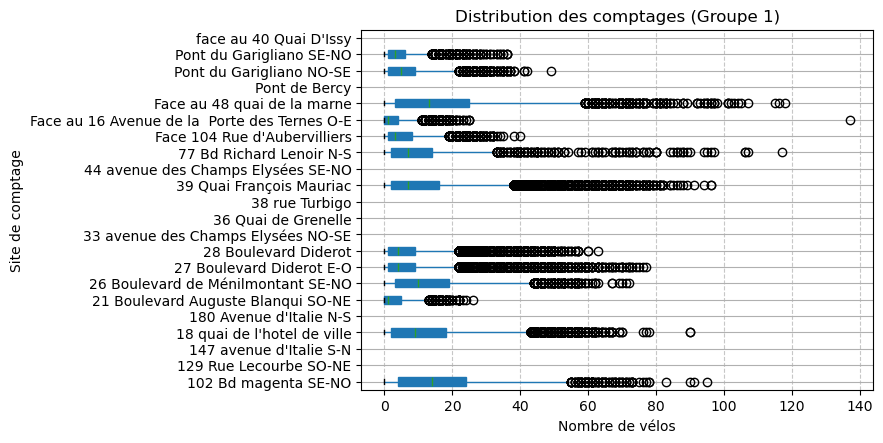

<Figure size 1200x600 with 0 Axes>

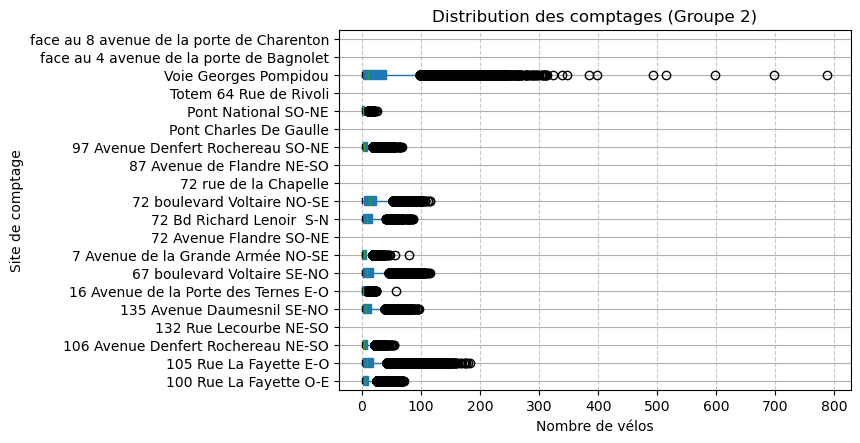

<Figure size 1200x600 with 0 Axes>

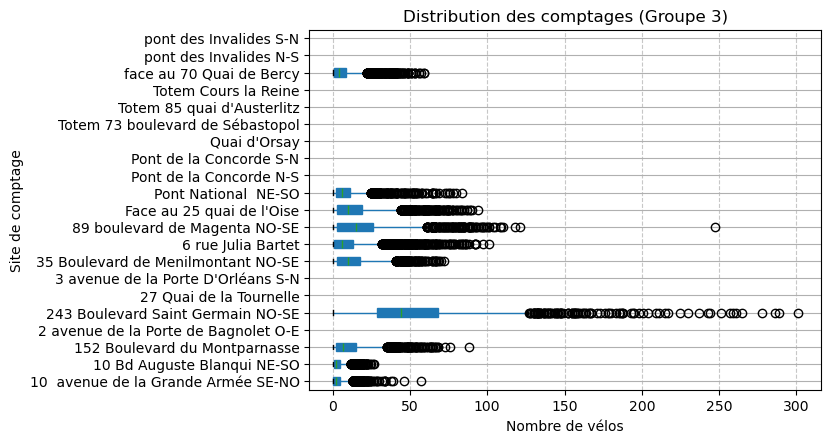

In [71]:
for i, group in enumerate(site_groups_2018):
    df_subset = df_2018[df_2018["Nom du point de comptage"].isin(group)]
    
    plt.figure(figsize=(12, 6))
    df_subset.boxplot(column="Comptage horaire", by="Nom du point de comptage", vert=False, patch_artist=True)
    
    plt.xlabel("Nombre de vélos")
    plt.ylabel("Site de comptage")
    plt.title(f"Distribution des comptages (Groupe {i+1})")
    plt.suptitle("")  # Enlever le titre par défaut
    
    plt.grid(axis = "x", linestyle = "--", alpha = 0.7)
    plt.show()

In [72]:
df_2018 = df_2018[df_2018["Année"]==2018]

In [73]:
# Regrouper par mois et sommer les comptages horaires
comptage_mensuel_2018 = df_2018.groupby(df_2018["Date et heure de comptage"].dt.to_period("M"))["Comptage horaire"].sum()

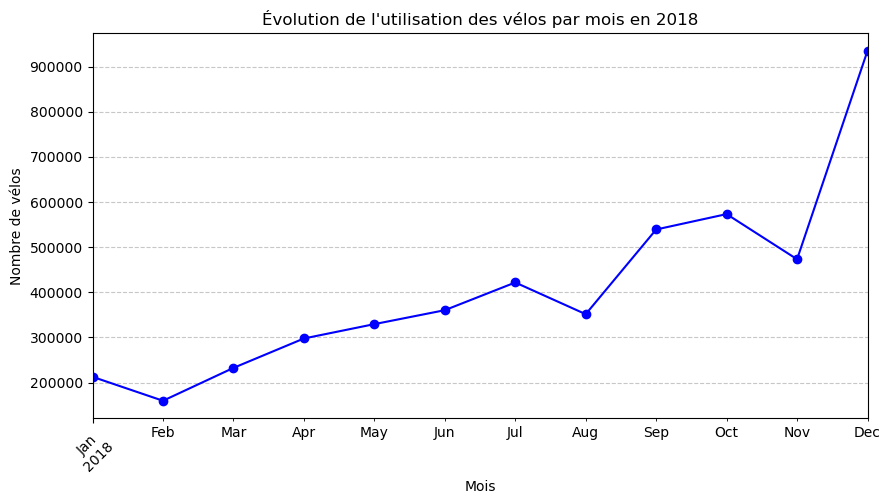

In [84]:
plt.figure(figsize=(10, 5))
comptage_mensuel_2018.plot(kind="line", marker="o", color="blue")

plt.xlabel("Mois")
plt.ylabel("Nombre de vélos")
plt.title("Évolution de l'utilisation des vélos par mois en 2018")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.xticks(rotation=45)  # Rotation des labels pour lisibilité

plt.show()

In [76]:
df_2019 = pd.read_csv("velo_2019.csv", sep = ";")

In [82]:
display(df_2019)

,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du point de comptage,Lien vers photo du point de comptage,Coordonnées géographiques
0,100003096,97 Avenue Denfert Rochereau SO-NE,8.0,2019-04-15T11:45:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
1,100003096,97 Avenue Denfert Rochereau SO-NE,7.0,2019-04-16T07:30:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
2,100003096,97 Avenue Denfert Rochereau SO-NE,17.0,2019-04-16T09:30:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
3,100003096,97 Avenue Denfert Rochereau SO-NE,9.0,2019-04-16T12:15:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
4,100003096,97 Avenue Denfert Rochereau SO-NE,9.0,2019-04-16T14:00:00+02:00,2012-02-22,https://www.eco-visio.net/Photos/100003096/157...,"48.834695,2.332968"
...,...,...,...,...,...,...,...
2271300,100057445,Totem 73 boulevard de Sébastopol,NaN,2019-09-02T13:45:00+02:00,2020-02-11,https://www.eco-visio.net/Photos/100057445/158...,"48.86377,2.35096"
2271301,100057445,Totem 73 boulevard de Sébastopol,NaN,2019-09-02T15:30:00+02:00,2020-02-11,https://www.eco-visio.net/Photos/100057445/158...,"48.86377,2.35096"
2271302,100057445,Totem 73 boulevard de Sébastopol,NaN,2019-09-02T18:30:00+02:00,2020-02-11,https://www.eco-visio.net/Photos/100057445/158...,"48.86377,2.35096"
2271303,100057445,Totem 73 boulevard de Sébastopol,NaN,2019-09-02T21:30:00+02:00,2020-02-11,https://www.eco-visio.net/Photos/100057445/158...,"48.86377,2.35096"


In [83]:
# Compter le nombre de NaN/NaT dans chaque colonne
nan_counts = df_2019.isna().sum()

print(nan_counts)
print('''
Attention tous les résultats montre des tendances néanmoins
ils comportent énorméments de NaN notamment le Comptage horaire.''')

Identifiant du point de comptage                 0
Nom du point de comptage                     69885
Comptage horaire                            945695
Date et heure de comptage                        0
Date d'installation du point de comptage     69885
Lien vers photo du point de comptage         69885
Coordonnées géographiques                    69885
dtype: int64

Attention tous les résultats montre des tendances néanmoins
ils comportent énorméments de NaN notamment le Comptage horaire.


In [85]:
# Convertir la colonne en datetime (avec gestion du fuseau horaire)
df_2019["Date et heure de comptage"] = pd.to_datetime(df_2019["Date et heure de comptage"], utc=True)
df_2019["Date et heure de comptage"] = df_2019["Date et heure de comptage"].dt.tz_localize(None)

In [86]:
#Met les dates dans l'ordre croissant
df_2019 = df_2019.sort_values(by="Date et heure de comptage")

In [87]:
df_2019["Jour"] = df_2019["Date et heure de comptage"].dt.date
df_2019["Mois"] = df_2019["Date et heure de comptage"].dt.month
df_2019["Année"] = df_2019["Date et heure de comptage"].dt.year
df_2019["Heure"] = df_2019["Date et heure de comptage"].dt.hour

In [88]:
df_2019.head()

,Identifiant du point de comptage,Nom du point de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du point de comptage,Lien vers photo du point de comptage,Coordonnées géographiques,Jour,Mois,Année,Heure
2098555,100056042,33 avenue des Champs Elysées NO-SE,NaN,2018-12-31 23:00:00,2019-10-30,https://www.eco-visio.net/Photos/100056042/157...,"48.869831,2.307076",2018-12-31,12,2018,23
351447,100044494,10 avenue de la Grande Armée SE-NO,0.0,2018-12-31 23:00:00,2018-07-27,https://www.eco-visio.net/Photos/100044494/157...,"48.874716,2.292439",2018-12-31,12,2018,23
2236635,100006301,NaN,7.0,2018-12-31 23:00:00,NaN,NaN,NaN,2018-12-31,12,2018,23
1401131,100047546,face au 70 Quai de Bercy,0.0,2018-12-31 23:00:00,2018-11-30,https://www.eco-visio.net/Photos/100047546/154...,"48.8295233,2.38699",2018-12-31,12,2018,23
2077576,100056044,132 Rue Lecourbe NE-SO,NaN,2018-12-31 23:00:00,2019-10-30,https://www.eco-visio.net/Photos/100056044/157...,"48.84216,2.30115",2018-12-31,12,2018,23


In [100]:
comptage_annuel_2019 = df_2019.groupby("Année")["Comptage horaire"].sum()
comptage_mensuel_2019 = df_2019.groupby("Mois")["Comptage horaire"].sum()
comptage_quotidien_2019 = df_2019.groupby("Jour")["Comptage horaire"].sum()
comptage_horaire_2019 = df_2019.groupby("Heure")["Comptage horaire"].sum()

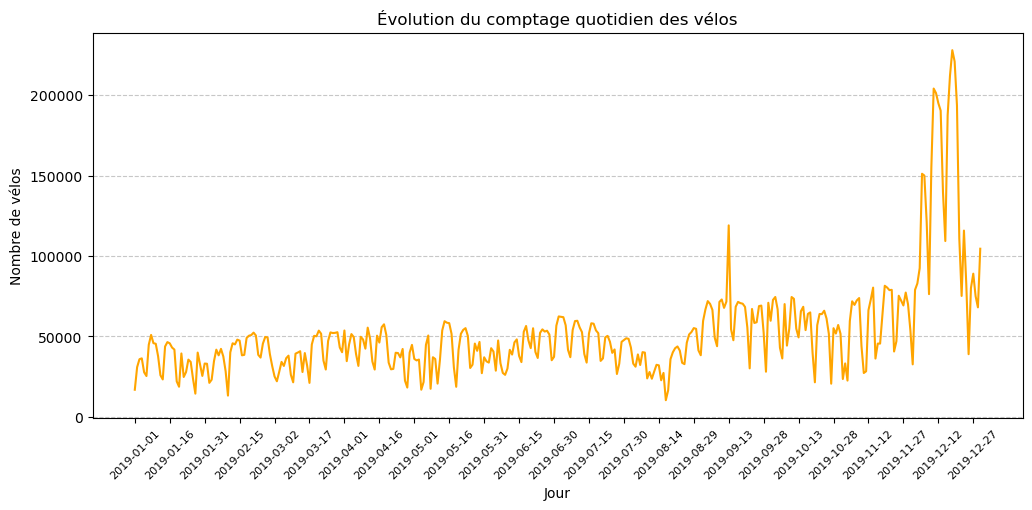

In [101]:
plt.figure(figsize=(12, 5))
plt.plot(comptage_quotidien_2019.index.astype(str), comptage_quotidien_2019.values, linestyle = "-", color = "orange")

plt.xlabel("Jour")
plt.ylabel("Nombre de vélos")
plt.title("Évolution du comptage quotidien des vélos")
plt.xticks(ticks = range(0, len(comptage_quotidien_2019), 15), labels = comptage_quotidien_2019.index[::15].astype(str), rotation = 45, fontsize = 8)

plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show() 

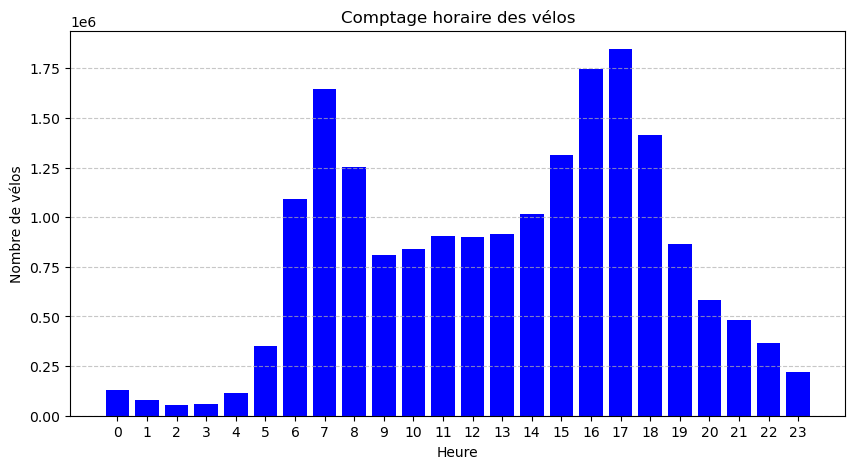


Nous pouvons constater ici que les heures les plus fréquentées sont celles de 7h et 17h
ce qui correspond plus ou moins aux horaires de travail et celles des étudiants.


In [102]:
plt.figure(figsize=(10, 5))
plt.bar(comptage_horaire_2019.index, comptage_horaire_2019.values, color = "blue")
plt.xticks(range(0,24))
plt.xlabel("Heure")
plt.ylabel("Nombre de vélos")
plt.title("Comptage horaire des vélos")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

print('''
Nous pouvons constater ici que les heures les plus fréquentées sont celles de 7h et 17h
ce qui correspond plus ou moins aux horaires de travail et celles des étudiants.''')

In [92]:
site_groups_2019 = np.array_split(df_2019["Nom du point de comptage"].unique(), 3)

<Figure size 1200x600 with 0 Axes>

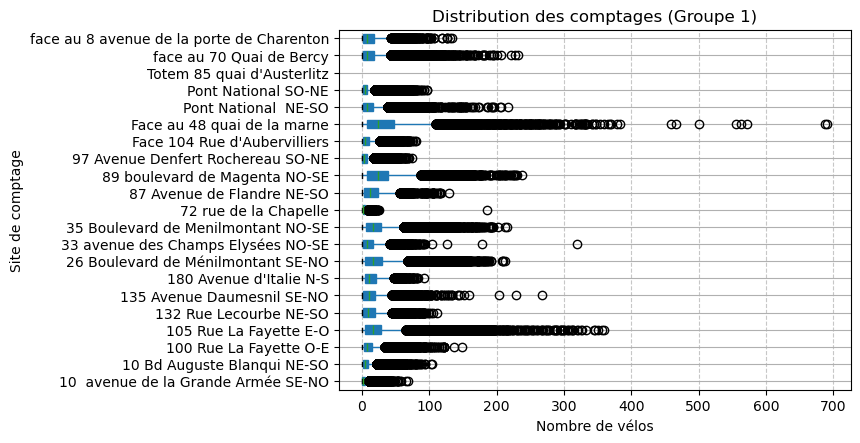

<Figure size 1200x600 with 0 Axes>

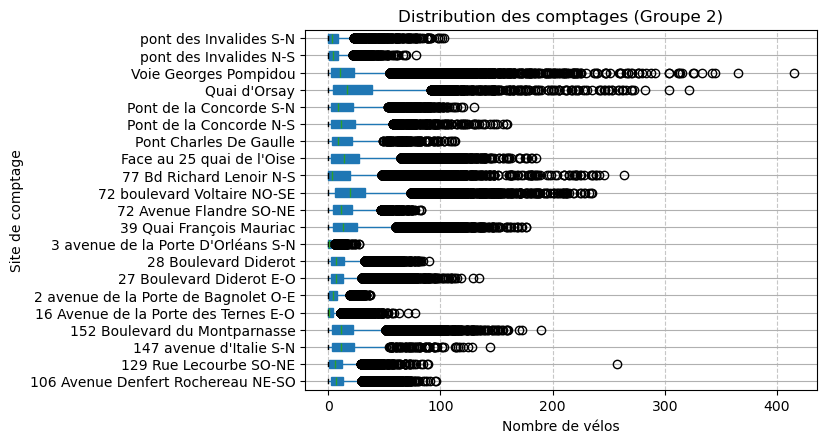

<Figure size 1200x600 with 0 Axes>

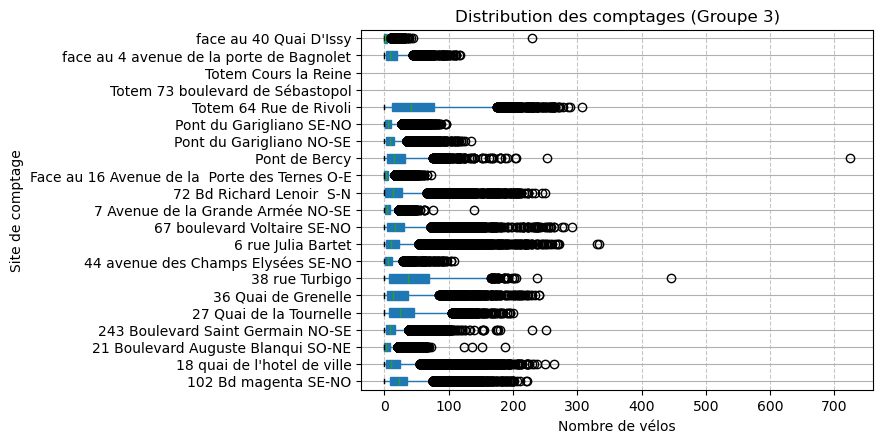

In [93]:
for i, group in enumerate(site_groups_2019):
    df_subset = df_2019[df_2019["Nom du point de comptage"].isin(group)]
    
    plt.figure(figsize=(12, 6))
    df_subset.boxplot(column="Comptage horaire", by="Nom du point de comptage", vert=False, patch_artist=True)
    
    plt.xlabel("Nombre de vélos")
    plt.ylabel("Site de comptage")
    plt.title(f"Distribution des comptages (Groupe {i+1})")
    plt.suptitle("")  # Enlever le titre par défaut
    
    plt.grid(axis = "x", linestyle = "--", alpha = 0.7)
    plt.show()

In [94]:
df_2019 = df_2019[df_2019["Année"]==2019]

In [95]:
# Regrouper par mois et sommer les comptages horaires
comptage_mensuel_2019 = df_2019.groupby(df_2019["Date et heure de comptage"].dt.to_period("M"))["Comptage horaire"].sum()

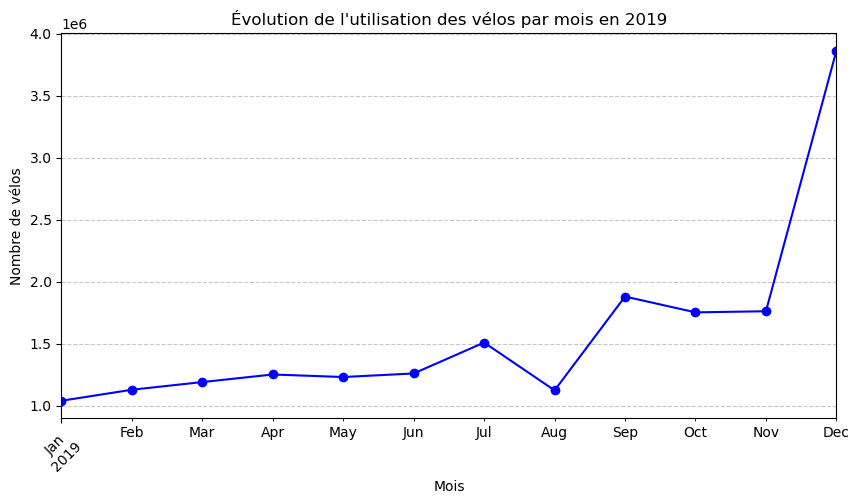

In [96]:
plt.figure(figsize=(10, 5))
comptage_mensuel_2019.plot(kind="line", marker="o", color="blue")

plt.xlabel("Mois")
plt.ylabel("Nombre de vélos")
plt.title("Évolution de l'utilisation des vélos par mois en 2019")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.xticks(rotation=45)  # Rotation des labels pour lisibilité

plt.show()

In [16]:
df = pd.read_csv("velo_2023.csv", sep = ";")

In [17]:
df.head()

,Identifiant du compteur,Nom du compteur,Identifiant du site de comptage,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Date d'installation du site de comptage,Lien vers photo du site de comptage,Coordonnées géographiques,Identifiant technique compteur,ID Photos,test_lien_vers_photos_du_site_de_comptage_,id_photo_1,url_sites,type_dimage,mois_annee_comptage
0,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,4,2023-01-01T07:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01
1,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,14,2023-01-01T04:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01
2,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,10,2023-01-01T09:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01
3,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,25,2023-01-01T16:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01
4,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,14,2023-01-01T05:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/93/e7...,"48.83504, 2.33314",Y2H21111072,https://filer.eco-counter-tools.com/file/93/e7...,https://filer.eco-counter-tools.com/file/93/e7...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2023-01


In [18]:
df["Nom du compteur"].nunique()

101

In [19]:
df["Nom du site de comptage"].nunique()

68

In [20]:
df.dtypes

Identifiant du compteur                       object
Nom du compteur                               object
Identifiant du site de comptage                int64
Nom du site de comptage                       object
Comptage horaire                               int64
Date et heure de comptage                     object
Date d'installation du site de comptage       object
Lien vers photo du site de comptage           object
Coordonnées géographiques                     object
Identifiant technique compteur                object
ID Photos                                     object
test_lien_vers_photos_du_site_de_comptage_    object
id_photo_1                                    object
url_sites                                     object
type_dimage                                   object
mois_annee_comptage                           object
dtype: object

In [21]:
# Convertir la colonne en datetime (avec gestion du fuseau horaire)
df["Date et heure de comptage"] = pd.to_datetime(df["Date et heure de comptage"], utc=True)
df["Date et heure de comptage"] = df["Date et heure de comptage"].dt.tz_localize(None)

In [22]:
df.insert(15, "Année", df["Date et heure de comptage"].dt.year)
df["Jour"] = df["Date et heure de comptage"].dt.date
df["Heure"] = df["Date et heure de comptage"].dt.hour

In [23]:
comptage_annuel = df.groupby("Année")["Comptage horaire"].sum()
comptage_mensuel = df.groupby("mois_annee_comptage")["Comptage horaire"].sum()
comptage_quotidien = df.groupby("Jour")["Comptage horaire"].sum()
comptage_horaire = df.groupby("Heure")["Comptage horaire"].sum()

In [24]:
print(comptage_annuel)
print("Au total, en 2023, on a relevé",(comptage_annuel).sum(), "cyclistes dans la capitale.")

Année
2023    66075432
Name: Comptage horaire, dtype: int64
Au total, en 2023, on a relevé 66075432 cyclistes dans la capitale.


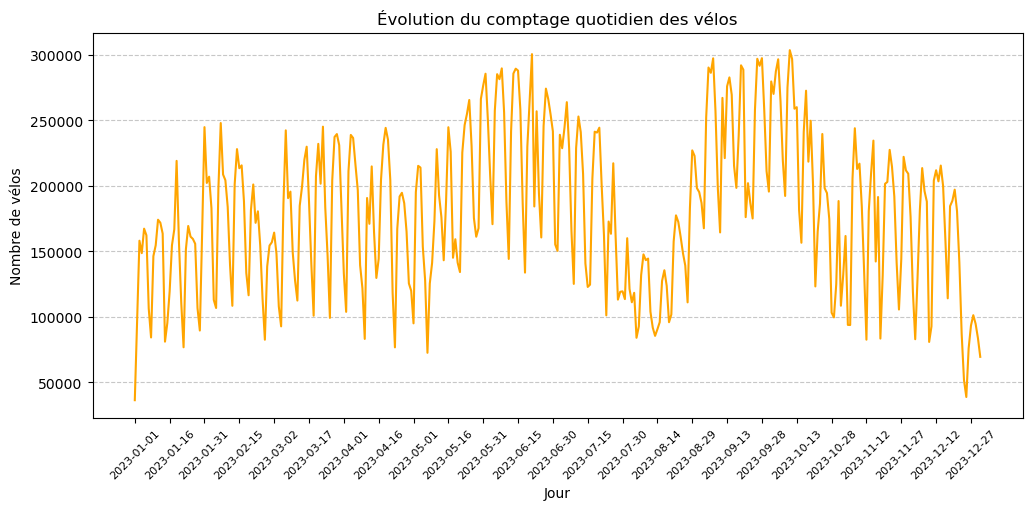

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(comptage_quotidien.index.astype(str), comptage_quotidien.values, linestyle = "-", color = "orange")

plt.xlabel("Jour")
plt.ylabel("Nombre de vélos")
plt.title("Évolution du comptage quotidien des vélos")
plt.xticks(ticks = range(0, len(comptage_quotidien), 15), labels = comptage_quotidien.index[::15].astype(str), rotation = 45, fontsize = 8)

plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show() 

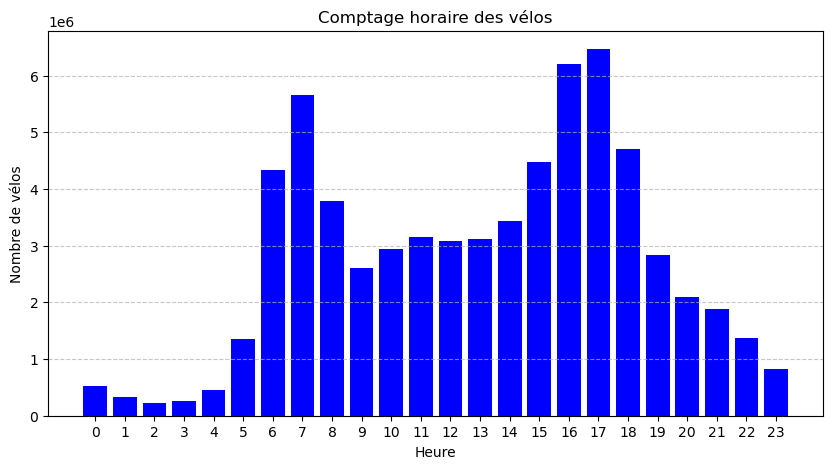


Nous pouvons constater ici que les heures les plus fréquentées sont celles de 7h et 17h
ce qui correspond plus ou moins aux horaires de travail et celles des étudiants.


In [26]:
plt.figure(figsize=(10, 5))
plt.bar(comptage_horaire.index, comptage_horaire.values, color = "blue")
plt.xticks(range(0,24))
plt.xlabel("Heure")
plt.ylabel("Nombre de vélos")
plt.title("Comptage horaire des vélos")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

print('''
Nous pouvons constater ici que les heures les plus fréquentées sont celles de 7h et 17h
ce qui correspond plus ou moins aux horaires de travail et celles des étudiants.''')

In [28]:
site_groups = np.array_split(df["Nom du site de comptage"].unique(), 3)

<Figure size 1200x600 with 0 Axes>

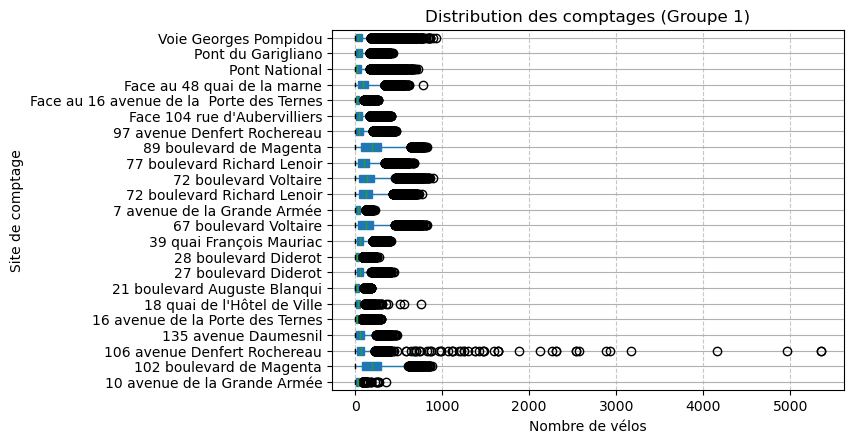

<Figure size 1200x600 with 0 Axes>

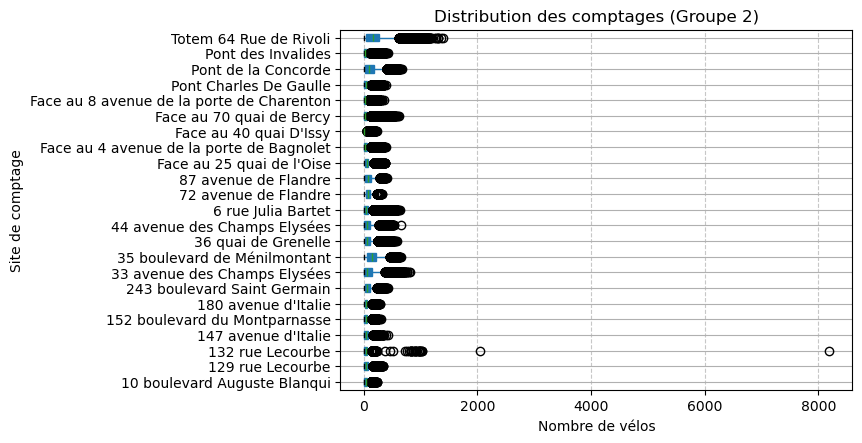

<Figure size 1200x600 with 0 Axes>

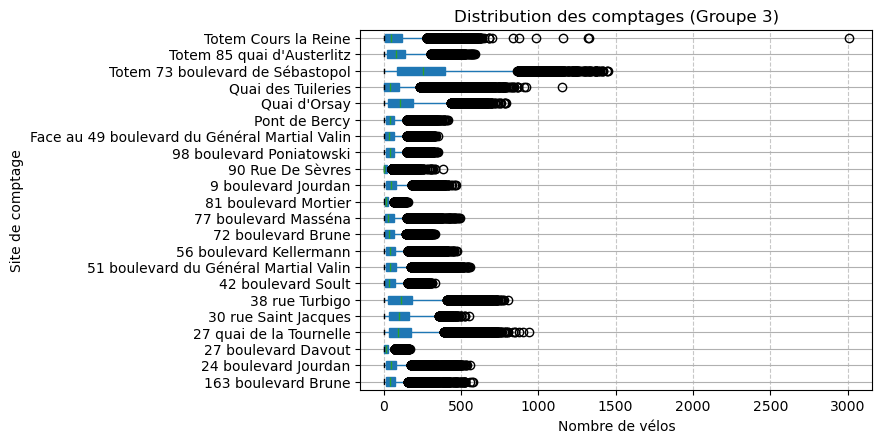

In [29]:
for i, group in enumerate(site_groups):
    df_subset = df[df["Nom du site de comptage"].isin(group)]
    
    plt.figure(figsize=(12, 6))
    df_subset.boxplot(column="Comptage horaire", by="Nom du site de comptage", vert=False, patch_artist=True)
    
    plt.xlabel("Nombre de vélos")
    plt.ylabel("Site de comptage")
    plt.title(f"Distribution des comptages (Groupe {i+1})")
    plt.suptitle("")  # Enlever le titre par défaut
    
    plt.grid(axis = "x", linestyle = "--", alpha = 0.7)
    plt.show()

print('''
Nous pouvons observer ici plusieurs outliers par rapport à l'année 2024
notamment au compteur situé au 106 avenue Denfert Rochereau où on distingue
13 outliers qui se détachent clairement du reste. On peut apercevoir également
qu'au 132 Rue Lacourbe, plus de 8000 vélos ont été relevé et environ 3000
au Totem Cours la Reine et ceci en 1h. Il serait intéressant de voir si on 
pourrait expliquer ceci par la situation géographique du compteur ou un événement praticulier.''')

In [33]:
jour_8000 = df[df["Comptage horaire"] > 8000]

print('''
Grâce à la cellule ci-dessous, on se rend compte qu'il s'agit du 22 Octobre 2023 à 3h du matin,
il n'y a pas vraiment d'explication pouvant expliquer ce chiffre.''')


Grâce à la cellule ci-dessous, on se rend compte qu'il s'agit du 22 Octobre 2023 à 3h du matin,
il n'y a pas vraiment d'explication pouvant expliquer ce chiffre.


In [32]:
print(jour_8000)

       Identifiant du compteur         Nom du compteur  \
445266     100056044-101056044  132 rue Lecourbe NE-SO   

        Identifiant du site de comptage Nom du site de comptage  \
445266                        100056044        132 rue Lecourbe   

        Comptage horaire Date et heure de comptage  \
445266              8190       2023-10-22 03:00:00   

       Date d'installation du site de comptage  \
445266                              2019-10-30   

                      Lien vers photo du site de comptage  \
445266  https://filer.eco-counter-tools.com/file/e5/c3...   

       Coordonnées géographiques Identifiant technique compteur  \
445266         48.84209, 2.30115                    Y2H18086315   

                                                ID Photos  \
445266  https://filer.eco-counter-tools.com/file/e5/c3...   

               test_lien_vers_photos_du_site_de_comptage_ id_photo_1  \
445266  https://filer.eco-counter-tools.com/file/e5/c3...     https:   

            

In [35]:
df_2023 = df[df["Année"]==2023]

In [37]:
# Regrouper par mois et sommer les comptages horaires
comptage_mensuel_2023 = df_2023.groupby(df_2023["Date et heure de comptage"].dt.to_period("M"))["Comptage horaire"].sum()

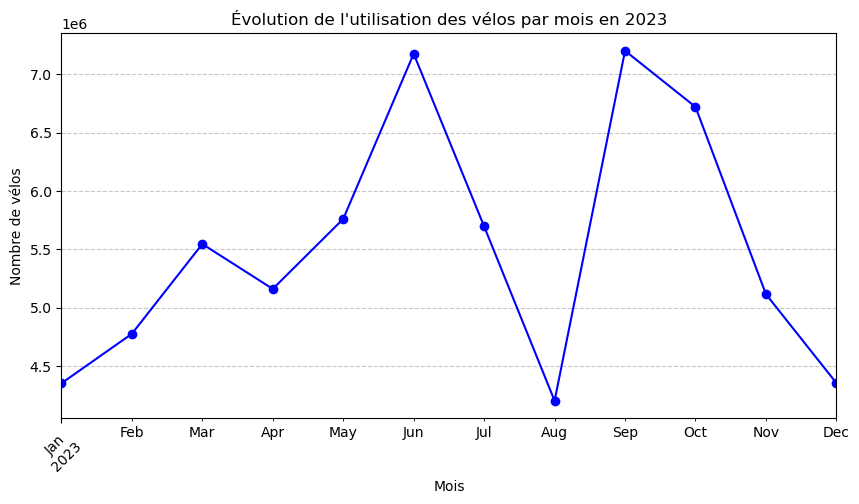

In [38]:
plt.figure(figsize=(10, 5))
comptage_mensuel_2023.plot(kind="line", marker="o", color="blue")

plt.xlabel("Mois")
plt.ylabel("Nombre de vélos")
plt.title("Évolution de l'utilisation des vélos par mois en 2023")
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
plt.xticks(rotation=45)  # Rotation des labels pour lisibilité

plt.show()